## Libraries import

In [30]:
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter


#per poter gestire file csv
import pandas as pd

download dataset from  kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [3]:
!kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset


  0%|          | 0.00/2.54k [00:00<?, ?B/s]
100%|██████████| 2.54k/2.54k [00:00<00:00, 208kB/s]


SPIEGARE COME è FATTO IL DATASET

### Extract and unzip dataset

In [3]:
zip_path = r"C:\Users\greta\Downloads\sleep-health-and-lifestyle-dataset.zip"
final_path = r"C:\Users\Greta\Desktop\Sleep_Data" 

# Crea la directory di destinazione se non esiste
os.makedirs(final_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(final_path)

In [2]:
#LO USA GIACOMO
dataset = r"C:\Users\Giacomo\Desktop\MagistraleDocumenti\AAA - Data Visualization\Python projects\PROGETTO GIT\Sleep_Data\Sleep_health_and_lifestyle_dataset.csv"

# Carica i dati in un DataFrame
df = pd.read_csv(dataset)

# Data visualization:

In [3]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [5]:
columns = [column for column in df.columns if column!='Person ID']

In [6]:
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

## SLEEP DISORDER

In [7]:
# sostituisco i valori NaN con 'No disorder'
df['Sleep Disorder'].fillna('No Disorder', inplace=True)

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_7976\1802460464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Disorder', inplace=True)


In [8]:
sleep_disorder_conteggio = df['Sleep Disorder'].value_counts().reset_index()
print(sleep_disorder_conteggio)

  Sleep Disorder  count
0    No Disorder    219
1    Sleep Apnea     78
2       Insomnia     77


In [9]:
fig=px.pie(sleep_disorder_conteggio,values='count',names='Sleep Disorder',title="Sleep Disorder category")
fig.show()

## BMI CATEGORY

##IO QUI FAREi NON UN LINEPLoT MA UN ISTOGRAMMA, PERCHE STIAMO LAVORANDO CON 5 FASCE DI ETA E NON DATI CONTINUI

In [10]:
#sostituisco normal con normal weight
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})
BMI_Category_conteggio=df['BMI Category'].value_counts().reset_index()
BMI_Category_conteggio

,BMI Category,count
0,Normal Weight,216
1,Overweight,148
2,Obese,10


In [11]:
fig=px.pie(BMI_Category_conteggio,values='count',names='BMI Category',title="the BMI Category")
fig.show()

## GENDER

In [12]:
gender_conteggio = df["Gender"].value_counts().reset_index()
fig = px.pie( gender_conteggio , values= "count", names="Gender")
fig.show()

# QUESTIONS

### 
come cambia la qualità del sonno in base all'eta? MANCA Is there a difference in how sleep quality varies with age between men and women?"
MANCA quale fascia d'età ha il sonno migliore e peggiore?  Are the worst sleep qualities associated with obesity or underweight individuals in certain age groups
il lavoro che fai influisce in qualche modo sullo sleep disorder? Are men or women in certain occupations more likely to have sleep disorders?"

In [143]:
'''df['bin_age'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50,55 ], 
                          labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51+'])
disorder_counts = df.groupby(['bin_age', 'Sleep Disorder']).size().unstack(fill_value=0)
disorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100

# Reset index for plotting
disorder_proportions = disorder_proportions.reset_index()

# Melt the dataframe for Plotly
melted_df = disorder_proportions.melt(id_vars='bin_age', var_name='Sleep Disorder', value_name='Percentage')

# Create the Interactive Plot
fig = px.bar(melted_df, x='bin_age', y='Percentage', color='Sleep Disorder', text='Percentage',
             title='Proporzione di Disturbi del Sonno per Fascia di Età',
             labels={'Age Group': 'Fascia di Età', 'Percentage': 'Percentuale', 'Sleep Disorder': 'Disturbo del Sonno'},
             color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')

# Show the plot
fig.show()'''


"df['bin_age'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50,55 ], \n                          labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51+'])\ndisorder_counts = df.groupby(['bin_age', 'Sleep Disorder']).size().unstack(fill_value=0)\ndisorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100\n\n# Reset index for plotting\ndisorder_proportions = disorder_proportions.reset_index()\n\n# Melt the dataframe for Plotly\nmelted_df = disorder_proportions.melt(id_vars='bin_age', var_name='Sleep Disorder', value_name='Percentage')\n\n# Create the Interactive Plot\nfig = px.bar(melted_df, x='bin_age', y='Percentage', color='Sleep Disorder', text='Percentage',\n             title='Proporzione di Disturbi del Sonno per Fascia di Età',\n             labels={'Age Group': 'Fascia di Età', 'Percentage': 'Percentuale', 'Sleep Disorder': 'Disturbo del Sonno'},\n             color_discrete_sequence=px.colors.sequential.Viridis)\n\n# Update layout for better readab

## come cambia la qualità del sonno in base all'eta?

In [13]:
# creo la colonna dei raggruppamenti per età
df['bin_age'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50,55 ], 
                          labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51+'])

# calcolo la media della qualità del sonno per ciascun gruppo di età
age_group_quality = df.groupby(['bin_age', 'Gender'])['Sleep Duration'].mean().reset_index()


print(age_group_quality)


   bin_age  Gender  Sleep Duration
0    25-30  Female        6.450000
1    25-30    Male        6.982143
2    31-35  Female        6.516667
3    31-35    Male        6.855357
4    36-40  Female        7.187179
5    36-40    Male        7.250000
6    41-45  Female        6.620000
7    41-45    Male        7.068116
8    46-50  Female        6.140000
9    46-50    Male        7.700000
10     51+  Female        7.958140
11     51+    Male             NaN


C:\Users\Giacomo\AppData\Local\Temp\ipykernel_7976\3913566890.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [14]:
male_data = age_group_quality[age_group_quality['Gender'] == 'Male']
female_data = age_group_quality[age_group_quality['Gender'] == 'Female']

In [15]:
print(male_data)

   bin_age Gender  Sleep Duration
1    25-30   Male        6.982143
3    31-35   Male        6.855357
5    36-40   Male        7.250000
7    41-45   Male        7.068116
9    46-50   Male        7.700000
11     51+   Male             NaN


In [16]:
print(female_data)

   bin_age  Gender  Sleep Duration
0    25-30  Female        6.450000
2    31-35  Female        6.516667
4    36-40  Female        7.187179
6    41-45  Female        6.620000
8    46-50  Female        6.140000
10     51+  Female        7.958140


In [17]:
fig = px.bar(
    age_group_quality,
    x="bin_age",
    y="Sleep Duration",
    color="Gender",
    barmode="group",  
    color_discrete_sequence=px.colors.qualitative.Set1_r, #CAMBIO COLORI
    title="Qualità del Sonno per Fascia di Età e Genere",
    labels={"bin_age": "Age", "Sleep Duration": "Sleep Duration(hrs)", "Gender": "Gender"},
)


fig.add_hline(
    y=7,
    line=dict(color="red", dash="dash", width=2),
    annotation_text="7 hrs",
    annotation_position="top right",
    annotation_font_size=12
)


fig.update_layout(
    xaxis_title="Age Group",  
    yaxis_title="Sleep duration (mean hrs)",  
    legend_title="Gender",  
    title_font_size=16, 
    title_x=0.5,  
    xaxis=dict(tickmode='linear'),  # Assicurati che le etichette siano tutte ben visibil
    yaxis=dict(range=[0, age_group_quality['Sleep Duration'].max() + 1]),  # Aggiungi spazio sopra per miglior visualizzazione
    font=dict(size=12), 
    margin=dict(t=40, b=40, l=50, r=50),  
    template="plotly_white",  
)


fig.show()


## il lavoro che fai influisce in qualche modo sullo sleep disorder? 

### Calcolo la percentuale di persone con disturbi del sonno per ogni professione

In [18]:
sleep_disorders = df[df['Sleep Disorder'] != 'No Disorder']

#calcolo quante persone hanno un disturbo del sonno 
disorder_conteggio= sleep_disorders.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

In [19]:
print(disorder_conteggio)

Sleep Disorder        Insomnia  Sleep Apnea
Occupation                                 
Accountant                   7            0
Doctor                       3            4
Engineer                     5            1
Lawyer                       2            3
Nurse                        3           61
Sales Representative         0            2
Salesperson                 29            1
Scientist                    0            2
Software Engineer            1            0
Teacher                     27            4


In [20]:
tot = df['Occupation'].value_counts()

#percentuale di persone con disturbi del sonno per ogni occupazione
disorder_percentages = disorder_conteggio.div(tot, axis=0) * 100

In [21]:
#trasformo in dataframe
disorder_percentages = disorder_percentages.reset_index().melt(id_vars='Occupation', 
                                                               var_name='Sleep Disorder', 
                                                               value_name='Percentage')


In [22]:
fig = px.bar(disorder_percentages, x='Percentage', y='Occupation', color='Sleep Disorder', 
             title='Distribuzione Percentuale dei Disturbi del Sonno per Occupazione',
             labels={'Sleep Disorder': 'Sleep Disorder', 'Percentage': 'Percentuale'},
             color_discrete_sequence=px.colors.qualitative.Pastel,  # Palette più leggibile
             orientation='h')


# Migliora la leggibilità
fig.update_layout(
    barmode='stack',  
    yaxis={'categoryorder': 'total ascending'},  # Ordina occupazioni in base alla somma
    xaxis_title='Percentuale di lavoratori con disturbi del sonno (%)',
    yaxis_title='',
    legend_title='Tipo di Disturbo del Sonno',
    template='plotly_white',  # Sfondo più pulito
    margin=dict(l=120, r=20, t=50, b=50),  # Spaziatura ottimizzata
)

fig.update_traces(
    hovertemplate="<b>Sleep Disorder:%{color_discrete_sequence} <b>Percentuale:</b> %{x:.2f}%"  # Nasconde il nome dell'occupazione
)

fig.show()

## Quale gender tende A SOFFRIRE DI PIU DI DISTRURBI DEL SONNO RISPETTO AI LAVORI SVOLTI?

In [23]:
sleep_disorders = df[~df['Sleep Disorder'].isna()]

#conto il numero di male/female per ogni lavoro svolto
sleepDisorder_lavoro_gender = sleep_disorders.groupby(['Occupation', 'Gender']).size()

# Conta il numero totale per ciascun genere+lavoro
totale = df.groupby(['Occupation', 'Gender']).size()

proporzione_lavoro_gender = (sleepDisorder_lavoro_gender / totale) * 100

In [24]:
#converto in datatframe
proporzione_df = proporzione_lavoro_gender.reset_index()

#rinomino le colonne
proporzione_df.columns = ['Occupation', 'Gender', 'Sleep Disorder Proportion (%)']


############################# Rimuovo i "Manager" e i "Sales Representative" #############################
proporzione_df = proporzione_df[~proporzione_df['Occupation'].isin(['Manager', 'Sales Representative'])]


# Ordino decrescente
proporzione_df = proporzione_df.sort_values(by='Sleep Disorder Proportion (%)', ascending=False)

print(proporzione_df)


           Occupation  Gender  Sleep Disorder Proportion (%)
0          Accountant  Female                          100.0
1          Accountant    Male                          100.0
2              Doctor  Female                          100.0
3              Doctor    Male                          100.0
4            Engineer  Female                          100.0
5            Engineer    Male                          100.0
6              Lawyer  Female                          100.0
7              Lawyer    Male                          100.0
9               Nurse  Female                          100.0
11        Salesperson    Male                          100.0
12          Scientist  Female                          100.0
13  Software Engineer    Male                          100.0
14            Teacher  Female                          100.0
15            Teacher    Male                          100.0


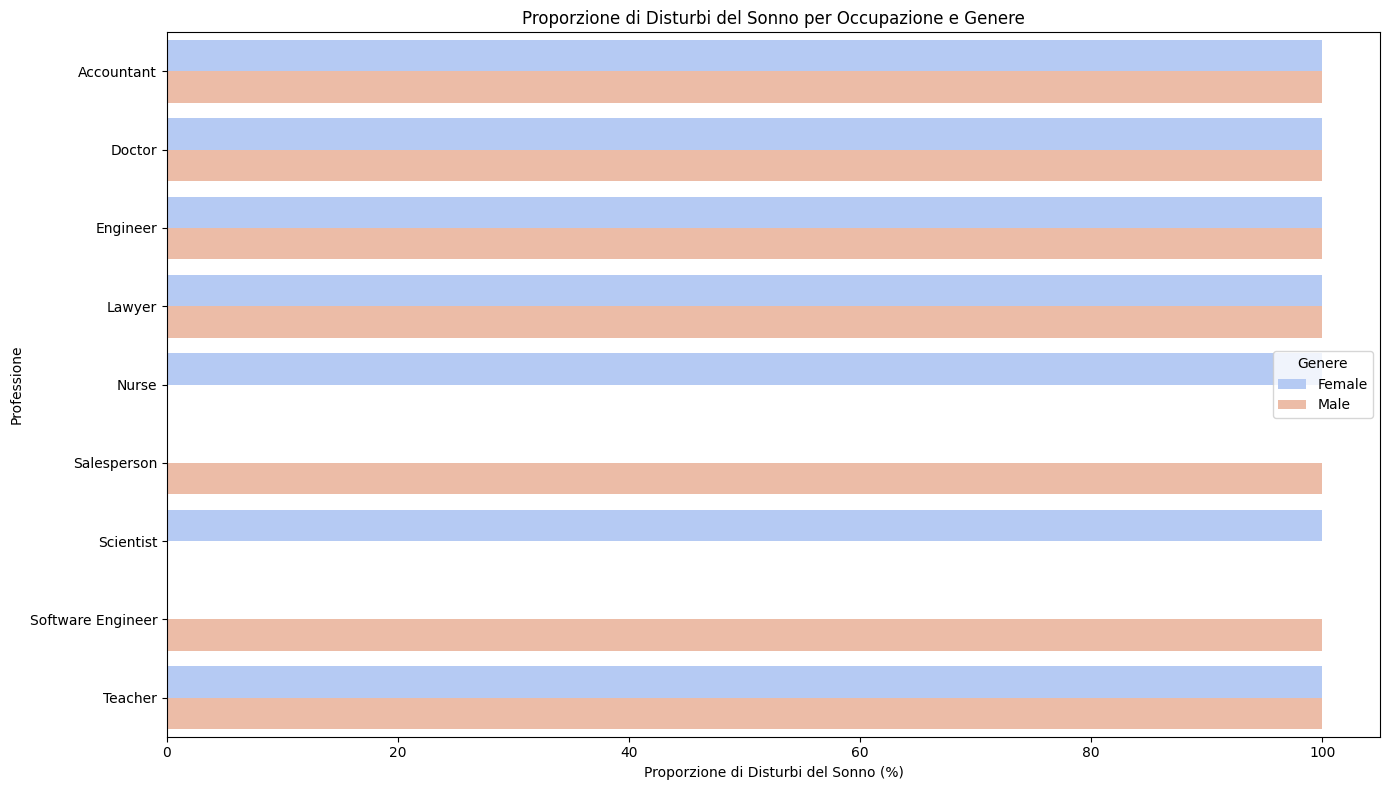

In [25]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=proporzione_df, 
    y='Occupation', 
    x='Sleep Disorder Proportion (%)', 
    hue='Gender', 
    palette='coolwarm'
)
plt.title('Proporzione di Disturbi del Sonno per Occupazione e Genere')
plt.ylabel('Professione')
plt.xlabel('Proporzione di Disturbi del Sonno (%)')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()


## Domanda: bmi category e sleep disorder correlazione

In [26]:
bmi_percent = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)
bmi_percent = bmi_percent.div(bmi_percent.sum(axis=1), axis=0) * 100


bmi_percent = bmi_percent.reset_index()
bmi_percent = bmi_percent.melt(id_vars='BMI Category', var_name='Sleep Disorder', value_name='Percentage')

In [27]:
fig = px.histogram(
    bmi_percent,
    x="BMI Category",
    y="Percentage",
    color="Sleep Disorder",
    title="Percentuale di Disturbi del Sonno per Categoria BMI",
    labels={"BMI Category": "Categoria BMI", "Percentage": "Percentuale", "Sleep Disorder": "Disturbo del Sonno"},
    barmode="stack"  # Stack delle barre per mostrare la somma al 100%
)

fig.show()

# Are Heart Rate and Blood Pressure related in some way between people with the same Physical Activity Level?

## Aggregating by Physical Activity Level


The scatter plot is too cluttered, so let's aggregate the instances by Physical Activity Level, then plotting Heart Rate mean and MAP mean for each group

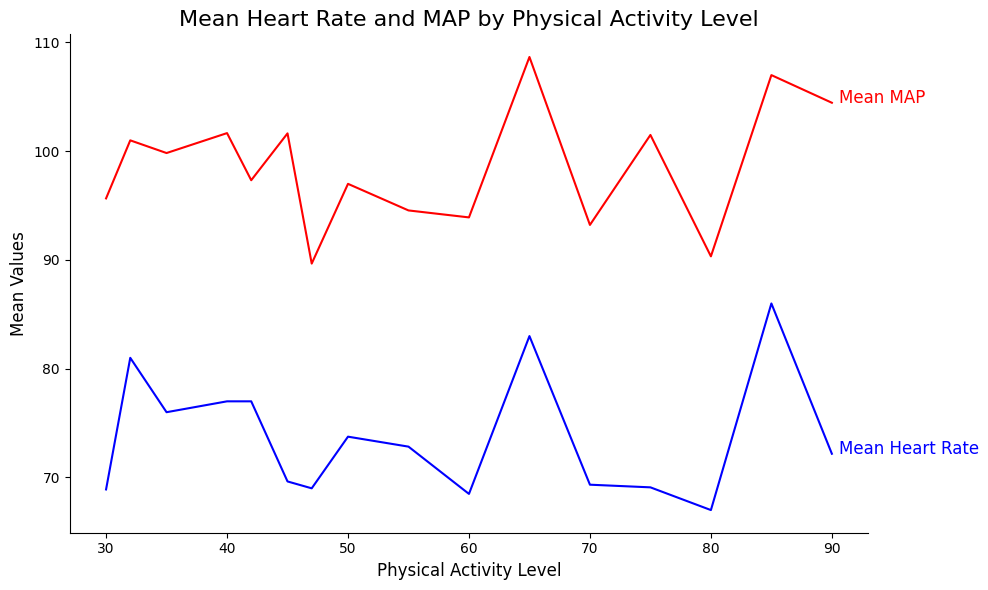

In [28]:
data = pd.read_csv(dataset)

# Calculate Mean Arterial Pressure (MAP)
def calculate_map(bp):
    max_bp, min_bp = map(int, bp.split('/'))
    return min_bp + (max_bp - min_bp) / 3

data['MAP'] = data['Blood Pressure'].apply(calculate_map)

# Aggregate Data by Physical Activity Level
aggregated_data = data.groupby('Physical Activity Level').agg({
    'Heart Rate': 'mean',
    'MAP': 'mean'
}).reset_index()

# Plot the Aggregated Data
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_data, x='Physical Activity Level', y='Heart Rate', label='Mean Heart Rate', color='b')
sns.lineplot(data=aggregated_data, x='Physical Activity Level', y='MAP', label='Mean MAP', color='r')
sns.despine()

# Add labels and title
plt.title('Mean Heart Rate and MAP by Physical Activity Level', fontsize=16)
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('Mean Values', fontsize=12)

for line in plt.gca().lines:
    line_label = line.get_label()
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    plt.annotate(line_label, xy=(x_data[-1], y_data[-1]), xytext=(5, 0), textcoords='offset points', color=line.get_color(), fontsize=12)

plt.legend().remove()
plt.tight_layout()
plt.show()

# Percentuale di persone con disturbi del sonno nelle varie fasce di età

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_7976\177731866.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



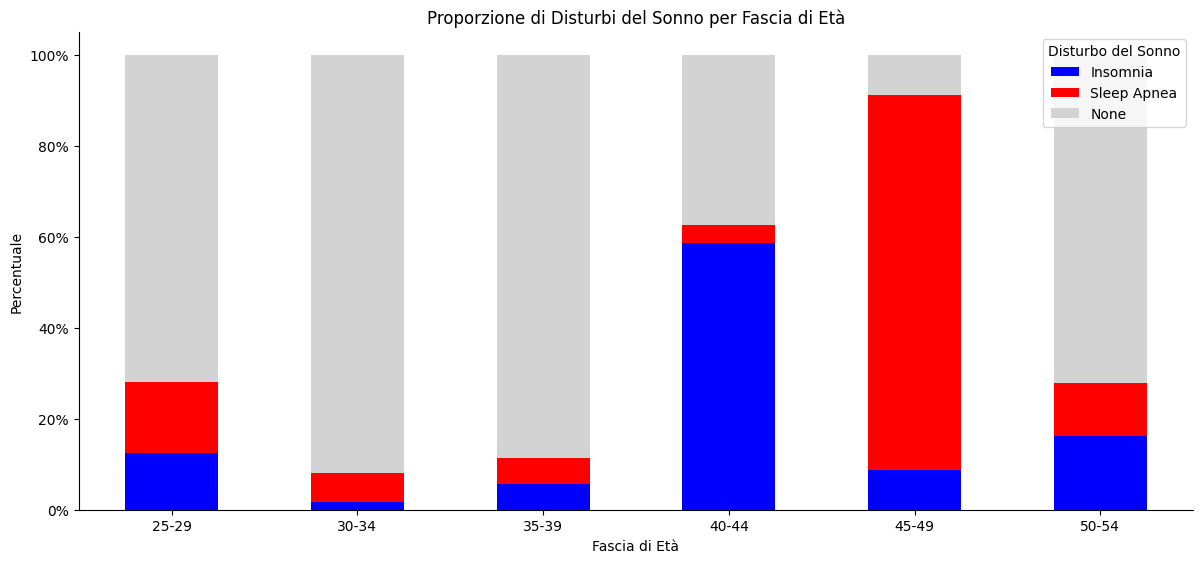

In [31]:
data = pd.read_csv(dataset)

# Create Age Groups
data['Age Group'] = pd.cut(data['Age'], bins=[25, 30, 35, 40, 45, 50, 55], labels=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54'])

# Fill NaN values in 'Sleep Disorder' with 'None'
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

# Calculate Proportion of Sleep Disorders by Age Group
disorder_counts = data.groupby(['Age Group', 'Sleep Disorder']).size().unstack(fill_value=0)
disorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100

# Ensure the columns are in the correct order
disorder_proportions = disorder_proportions[['Insomnia', 'Sleep Apnea', 'None']]

# Plot the data
colors = {'Insomnia': 'blue', 'Sleep Apnea': 'red', 'None': 'lightgray'}
ax = disorder_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in disorder_proportions.columns])

plt.title('Proporzione di Disturbi del Sonno per Fascia di Età')
plt.xlabel('Fascia di Età')
plt.ylabel('Percentuale')
plt.legend(title='Disturbo del Sonno')
plt.tight_layout()
plt.xticks(rotation=0)
sns.despine()

# Format y-axis labels to include percentage sign
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.show()

## Versione migliore con HOVER

In [32]:
data = pd.read_csv(dataset)

# Create Age Groups
data['Age Group'] = pd.cut(data['Age'], bins=[25, 30, 35, 40, 45, 50, 55], labels=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54'])

# Fill NaN values in 'Sleep Disorder' with 'None'
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

# Calculate Proportion of Sleep Disorders by Age Group
disorder_counts = data.groupby(['Age Group', 'Sleep Disorder']).size().unstack(fill_value=0)
disorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100

# Reset index for plotting
disorder_proportions = disorder_proportions.reset_index()

# Melt the dataframe for Plotly
melted_df = disorder_proportions.melt(id_vars='Age Group', var_name='Sleep Disorder', value_name='Percentage')

# Create the Interactive Plot with specified colors
fig = px.bar(melted_df, x='Age Group', y='Percentage', color='Sleep Disorder', text=None,
             title='Percentage of sleep disorders for each age group',
             labels={'Age Group': 'Age Group', 'Percentage': 'Percentage', 'Sleep Disorder': 'Sleep Disorder'},
             category_orders={'Sleep Disorder': ['Insomnia', 'Sleep Apnea', 'None']},
             color_discrete_map={'Insomnia': '#6D8B74', 'Sleep Apnea': '#A5D6A7', 'None': '#E0E0E0'})

# Update layout for better readability
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'category ascending'},
    yaxis={'title': '', 'tickformat':''},
    plot_bgcolor='rgba(255,255,255,255)', 
    paper_bgcolor='rgba(255,255,255,255)',
    showlegend = False
)

for trace in fig.data:
    trace.customdata = melted_df[melted_df['Sleep Disorder'] == trace.name]['Sleep Disorder']
    trace.hovertemplate = '%{customdata}<br>%{x}<br>%{y:.3f}%'
    trace.hoverlabel = {'namelength': 0}

# Show the plot
fig.show()


C:\Users\Giacomo\AppData\Local\Temp\ipykernel_7976\2243824412.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Bad sleep quality is associated with obesity or overweight individuals?

In [33]:
data = pd.read_csv(dataset)

# Replace "Normal Weight" with "Normal" in the BMI Category column
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')
# Replace "Obese" with "Overweight" in the BMI Category column
#data['BMI Category'] = data['BMI Category'].replace('Obese', 'Overweight')

# Verify the change
data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

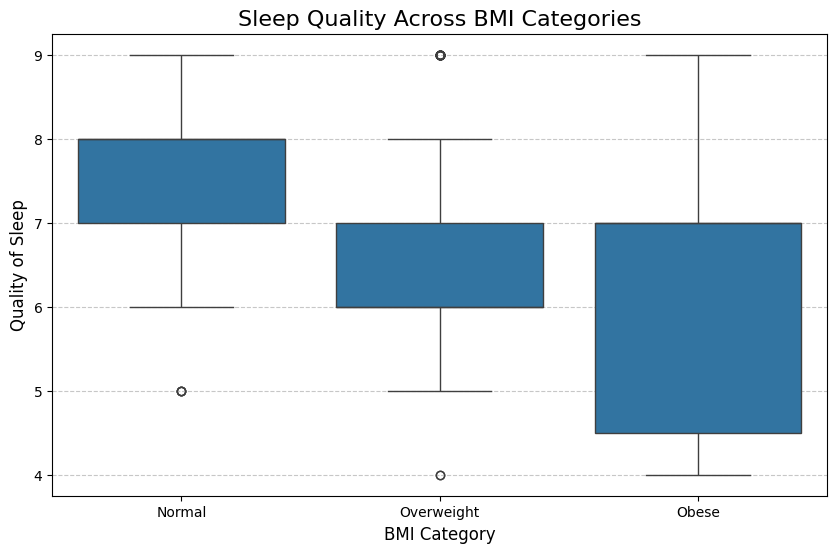

In [34]:
# Create a boxplot to visualize the distribution of sleep quality across BMI categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='BMI Category', y='Quality of Sleep', order=['Normal', 'Overweight', 'Obese'])

# Add labels and title
plt.title('Sleep Quality Across BMI Categories', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

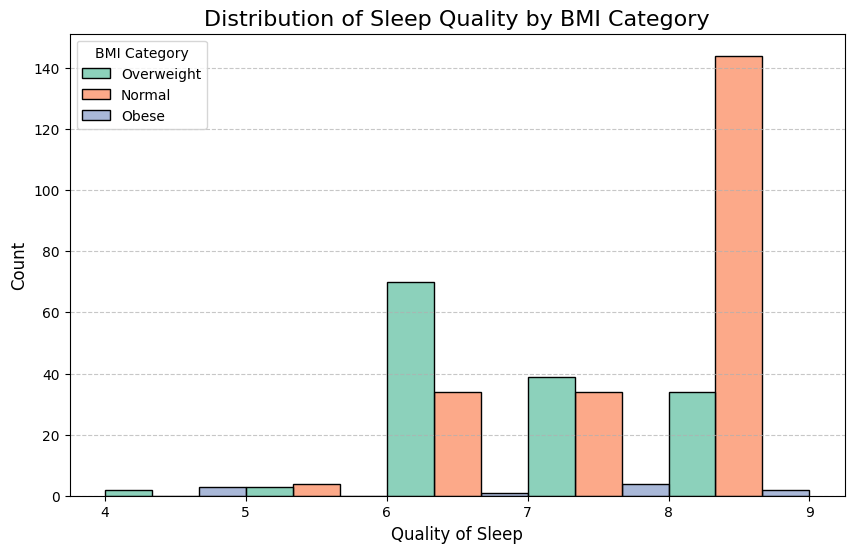

In [35]:
# Histogram/faceted density plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Quality of Sleep', hue='BMI Category', multiple='dodge', binwidth=1, palette='Set2', edgecolor='black')
plt.title('Distribution of Sleep Quality by BMI Category', fontsize=16)
plt.xlabel('Quality of Sleep', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()